In [1]:
# Import Pandas Repository
import pandas as pd

# Read the dataset using read_excel function from Pandas
churn_dataset = pd.read_excel('turknetchurnekimanonim.xlsx')

# Show first a few rows of the data
churn_dataset.head(5)


,Unnamed: 0,ILTELKODU,ILADI,POSILCE,ILCE,CINSIYET,DURUM,ABONEBAS,CLOSE_DATE,KALDIGI_AY_SAYISI,...,DENVERGIRISTARIHI_3,DENVERCIKISTARIHI_3,DENVERKALDIGISURE_GUN_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3,CHURNTEST_DATE
0,0,212.0,İstanbul (Avrupa),939.0,SULTANGAZİ,E,A,2016-04-20,NaT,54,...,NaN,NaN,0,0,10,87108,0,16.5013,272.1967,2020-10-31
1,1,212.0,İstanbul (Avrupa),420.0,SARIYER,K,A,2016-04-20,NaT,54,...,NaN,NaN,0,0,1,90271,0,135.8656,185.5825,2020-10-31
2,2,262.0,Kocaeli,998.0,İZMİT,E,A,2016-04-21,NaT,54,...,NaN,NaN,0,0,3,90112,0,1.8255,46.6458,2020-10-31
3,3,212.0,İstanbul (Avrupa),418.0,KÜÇÜKÇEKMECE,E,A,2016-04-21,NaT,54,...,NaN,NaN,0,0,15,87588,1664,2.0288,42.0181,2020-10-31
4,4,212.0,İstanbul (Avrupa),425.0,BAYRAMPAŞA,E,A,2016-04-21,2020-10-02,54,...,NaN,NaN,0,0,0,0,0,0.0000,0.0000,2020-10-31


A    180341
K     11953
Name: DURUM, dtype: int64


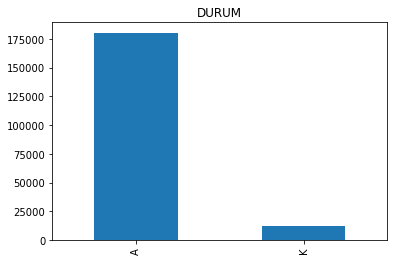

In [2]:
# check the DURUM column of data
print(churn_dataset.DURUM.value_counts())

# plot the values of DURUM
churn_dataset.DURUM.value_counts().plot(kind='bar', title='DURUM');

Before under sampling
0: 180341  1: 11953
After random under-sampling:
1    11953
0    11953
Name: DURUM, dtype: int64


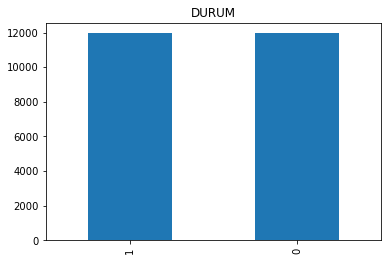

In [3]:
# Import label encoding function to digitize categorical values.
from sklearn.preprocessing import LabelEncoder

# apply label encoding for 'DURUM' column
labelEncoder = LabelEncoder()
churn_dataset['DURUM'] = labelEncoder.fit_transform(churn_dataset['DURUM'])

# undersampling to equalize 'DURUM' classes
DURUM_0, DURUM_1 = churn_dataset.DURUM.value_counts()
print("Before under sampling\n0:",DURUM_0," 1:",DURUM_1)

# Divide the data by class by 'DURUM' feature 
data_DURUM_0 = churn_dataset[churn_dataset['DURUM'] == 0]
data_DURUM_1 = churn_dataset[churn_dataset['DURUM'] == 1]


# undersampling for large data_DURUM_0 with length of data_DURUM_1
data_DURUM_0_undersampled = data_DURUM_0.sample(DURUM_1)

#combine the data_DURUM_0_undersampled and data_DURUM_1 as data
churn_dataset = pd.concat([data_DURUM_0_undersampled, data_DURUM_1], axis=0)

# clean the temporary objects
del data_DURUM_0
del data_DURUM_1
del data_DURUM_0_undersampled

# shuffle the rows of data
churn_dataset.sample(frac=1)

# check the data after undersampling
print('After random under-sampling:')
print(churn_dataset.DURUM.value_counts())

churn_dataset.DURUM.value_counts().plot(kind='bar', title='DURUM');

In [4]:
# Removing the columns which has only one unique value.

for col_name in churn_dataset.columns:
    if len(churn_dataset[col_name].unique()) == 1:
        churn_dataset = churn_dataset.drop(col_name,1)
        print("Freature '{col_name}' is removed from data because it has only one unique value".format(col_name=col_name))
churn_dataset.head()    

Freature 'HIZMETKANALI_SIKAYETSAYISI_1' is removed from data because it has only one unique value
Freature 'FATURAINCELEME_DESTEKSAYISI_1' is removed from data because it has only one unique value
Freature 'HIZMETKANALI_TICKETKAPANMASURESI_1' is removed from data because it has only one unique value
Freature 'HIZMETKANALI_TICKETSL_1' is removed from data because it has only one unique value
Freature 'FATURAINCELEME_DESTEKKAPANMASURESI_1' is removed from data because it has only one unique value
Freature 'FATURAINCELEME_TICKETSL_1' is removed from data because it has only one unique value
Freature 'OIMSIKAYET_DESTEKKAPANMASURESI_1' is removed from data because it has only one unique value
Freature 'OIMSIKAYET_TICKETSL_1' is removed from data because it has only one unique value
Freature 'BTK_SIKAYET_1' is removed from data because it has only one unique value
Freature 'DENVERGIRISTARIHI_1' is removed from data because it has only one unique value
Freature 'DENVERCIKISTARIHI_1' is remove

,Unnamed: 0,ILTELKODU,ILADI,POSILCE,ILCE,CINSIYET,DURUM,ABONEBAS,CLOSE_DATE,KALDIGI_AY_SAYISI,...,ADSLARIZA_TICKETKAPANMASURESI_3,ADSLARIZA_TICKETSL_3,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,INTERNETEBAGLANAMIYORUM_TICKETSL_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3
11175,11175,212.0,İstanbul (Avrupa),939.0,SULTANGAZİ,E,0,2017-03-02,NaT,43,...,0,0,0,0,0,22,86209,1201,4.8506,125.5251
161500,161500,442.0,Erzurum,974.0,YAKUTİYE,E,0,2020-07-03,NaT,3,...,189,0,0,0,0,2,89931,0,2.0712,31.6134
80867,80867,264.0,Sakarya,694.0,GEYVE,E,0,2020-01-18,NaT,9,...,2877,0,0,0,0,10,90021,12,17.6501,394.4293
136546,136546,224.0,Bursa,186.0,OSMANGAZİ,E,0,2020-05-01,NaT,5,...,0,0,0,0,0,12,89536,0,8.5596,167.5942
10448,10448,212.0,İstanbul (Avrupa),420.0,SARIYER,E,0,2017-01-17,NaT,45,...,1060,0,0,0,0,5,89883,0,7.8689,274.3287


In [5]:
# decide which categorical variables you want to use in model
for col_name in churn_dataset.columns:
    type_name = churn_dataset[col_name].dtypes
    unique_cat = len(churn_dataset[col_name].unique())
    print("Feature '{col_name}'('{type_name}') has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat,type_name=type_name))

Feature 'Unnamed: 0'('int64') has 23906 unique categories
Feature 'ILTELKODU'('float64') has 83 unique categories
Feature 'ILADI'('object') has 83 unique categories
Feature 'POSILCE'('float64') has 1215 unique categories
Feature 'ILCE'('object') has 623 unique categories
Feature 'CINSIYET'('object') has 2 unique categories
Feature 'DURUM'('int64') has 2 unique categories
Feature 'ABONEBAS'('datetime64[ns]') has 1475 unique categories
Feature 'CLOSE_DATE'('datetime64[ns]') has 109 unique categories
Feature 'KALDIGI_AY_SAYISI'('int64') has 53 unique categories
Feature 'ODEMESEKLI'('object') has 2 unique categories
Feature 'ACIKLAMA'('object') has 15 unique categories
Feature 'FATURAGONDERIMTIPI'('object') has 3 unique categories
Feature 'RISKLIMUSTERI'('int64') has 2 unique categories
Feature 'YAPA_VAE'('object') has 2 unique categories
Feature 'KAPASITE'('int64') has 6 unique categories
Feature 'currentDown'('float64') has 5755 unique categories
Feature 'ARKADASINIGETIR'('float64') has 

In [6]:
# there are hundreds of different 'ILCE' values, it is meaningless to use this column.
# remove the unnecessary columns.
churn_dataset = churn_dataset.drop('ILCE',1)
churn_dataset = churn_dataset.drop('POSILCE',1)
churn_dataset = churn_dataset.drop('ILTELKODU',1)
churn_dataset = churn_dataset.drop('ILADI',1)
churn_dataset = churn_dataset.drop('ABONEBAS',1)
churn_dataset = churn_dataset.drop('CLOSE_DATE',1)
churn_dataset = churn_dataset.drop('Unnamed: 0',1)

churn_dataset

,CINSIYET,DURUM,KALDIGI_AY_SAYISI,ODEMESEKLI,ACIKLAMA,FATURAGONDERIMTIPI,RISKLIMUSTERI,YAPA_VAE,KAPASITE,currentDown,...,ADSLARIZA_TICKETKAPANMASURESI_3,ADSLARIZA_TICKETSL_3,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,INTERNETEBAGLANAMIYORUM_TICKETSL_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3
11175,E,0,43,B,(Bireysel)(Tam İletişim)(Yapa) 100 Mbps'e Kadar,E-ARŞİV,0,VAE,102400,32768.0,...,0,0,0,0,0,22,86209,1201,4.8506,125.5251
161500,E,0,3,B,(Bireysel)(Yalın) 35 Mbps'e kadar,E-ARŞİV,0,VAE,35840,19031.0,...,189,0,0,0,0,2,89931,0,2.0712,31.6134
80867,E,0,9,K,(Bireysel)(Tam İletişim) 35 Mbps'e Kadar,E-ARŞİV,0,VAE,35840,35832.0,...,2877,0,0,0,0,10,90021,12,17.6501,394.4293
136546,E,0,5,B,(Bireysel)(Tam İletişim) 35 Mbps'e Kadar,E-ARŞİV,0,VAE,35840,35836.0,...,0,0,0,0,0,12,89536,0,8.5596,167.5942
10448,E,0,45,K,(Bireysel)(Tam İletişim) 50 Mbps'e Kadar,E-ARŞİV,0,VAE,51200,50620.0,...,1060,0,0,0,0,5,89883,0,7.8689,274.3287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,E,1,3,B,(Bireysel)(Yalın) 35 Mbps'e kadar,E-ARŞİV,0,VAE,35840,8967.0,...,0,0,0,0,0,2,94114,0,6.4082,113.3355
192248,E,1,3,B,(Bireysel)(Yalın) 16 Mbps'e kadar,E-ARŞİV,0,VAE,16384,0.0,...,4262,0,0,0,0,0,0,0,0.0000,0.0000
192270,E,1,3,B,(Bireysel)(Tam İletişim)(Yapa) 100 Mbps'e Kadar,E-ARŞİV,0,YAPA,102400,NaN,...,64468,1,0,0,0,4,3756,300,0.0578,0.3266
192282,E,1,3,K,(Bireysel)(Yalın) 35 Mbps'e kadar,E-ARŞİV,0,VAE,35840,35840.0,...,0,0,0,0,0,0,86462,0,2.0478,22.9172


In [7]:
# check the 'ACIKLAMA' column's values. We can convert this feature to integer values depending on bandwidth.
churn_dataset['ACIKLAMA'].value_counts().sort_values(ascending=False).head(30)

(Bireysel)(Tam İletişim) 35 Mbps'e Kadar           11658
(Bireysel)(Tam İletişim) 16 Mbpse Kadar             3821
(Bireysel)(Tam İletişim)(Yapa) 100 Mbps'e Kadar     3228
(Bireysel)(Yalın) 35 Mbps'e kadar                   1739
(Bireysel)(Tam İletişim) 75 Mbps'e Kadar            1117
(Bireysel)(Tam İletişim) 100 Mbps'e Kadar            960
(Bireysel)(Yalın) 16 Mbps'e kadar                    516
(Bireysel)(Tam İletişim) 50 Mbps'e Kadar             461
(Bireysel)(Yalın)(Yapa) 100 Mbps'e kadar             138
(Bireysel)(Yalın) 75 Mbps'e kadar                    102
(Bireysel)(Yalın) 100 Mbps'e kadar                    99
(Bireysel)(TN Fiber) 100 Mbps                         39
(Bireysel)(Yalın) 50 Mbps'e kadar                     26
(Bireysel)(TN Fiber) 200 Mbps                          1
(Bireysel)(TT Fiber) 100 Mbps                          1
Name: ACIKLAMA, dtype: int64

In [8]:
# replacing the string values with integer values.

churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 16 Mbpse Kadar",
                                                              "(Bireysel)(Yalın) 16 Mbps'e kadar"],16)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 35 Mbps'e Kadar",
                                                              "(Bireysel)(Yalın) 35 Mbps'e kadar"],35)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 75 Mbps'e Kadar",
                                                              "(Bireysel)(Yalın) 75 Mbps'e kadar"],75)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim)(Yapa) 100 Mbps'e Kadar",
                                                              "(Bireysel)(Tam İletişim) 100 Mbps'e Kadar",
                                                              "(Bireysel)(TN Fiber) 100 Mbps",
                                                              "(Bireysel)(Yalın) 100 Mbps'e kadar",
                                                              "(Bireysel)(Yalın)(Yapa) 100 Mbps'e kadar",
                                                              "(Bireysel)(TT Fiber) 100 Mbps",
                                                              "(Bireysel)(Yalın)(TT Fiber) 100 Mbps"],100)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(Tam İletişim) 50 Mbps'e Kadar",
                                                              "(Bireysel)(Yalın) 50 Mbps'e kadar",],50)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(TN Fiber) 200 Mbps"],200)
churn_dataset['ACIKLAMA'] = churn_dataset['ACIKLAMA'].replace(["(Bireysel)(TN Fiber) 1000 Mbps"],1000)

35     13397
100     4465
16      4337
75      1219
50       487
200        1
Name: ACIKLAMA, dtype: int64


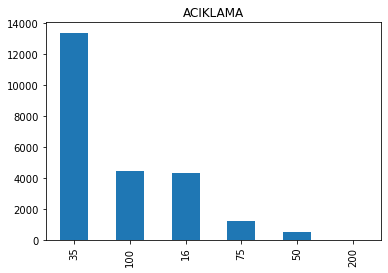

In [9]:
# check the 'ACIKLAMA' column again.
print(churn_dataset['ACIKLAMA'].value_counts().sort_values(ascending=False).head(12))

# plot the 'ACIKLAMA' column
churn_dataset.ACIKLAMA.value_counts().plot(kind='bar', title='ACIKLAMA');

In [10]:

# applying label encoding on the non-integer features.
churn_dataset['CINSIYET'] = labelEncoder.fit_transform(churn_dataset['CINSIYET'])
churn_dataset['ODEMESEKLI'] = labelEncoder.fit_transform(churn_dataset['ODEMESEKLI'])
churn_dataset['FATURAGONDERIMTIPI'] = labelEncoder.fit_transform(churn_dataset['FATURAGONDERIMTIPI'])
churn_dataset['RISKLIMUSTERI'] = labelEncoder.fit_transform(churn_dataset['RISKLIMUSTERI'])
churn_dataset['YAPA_VAE'] = labelEncoder.fit_transform(churn_dataset['YAPA_VAE'])
churn_dataset

,CINSIYET,DURUM,KALDIGI_AY_SAYISI,ODEMESEKLI,ACIKLAMA,FATURAGONDERIMTIPI,RISKLIMUSTERI,YAPA_VAE,KAPASITE,currentDown,...,ADSLARIZA_TICKETKAPANMASURESI_3,ADSLARIZA_TICKETSL_3,INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_3,INTERNETEBAGLANAMIYORUM_TICKETSL_3,IKNATICKET_3,PORTERROR_SAYISI_3,MAX_SESSIONTIME_3,MIN_SESSIONTIME_3,TOTALUPLOADGB_3,TOTALDOWNLOADGB_3
11175,0,0,43,0,100,0,0,0,102400,32768.0,...,0,0,0,0,0,22,86209,1201,4.8506,125.5251
161500,0,0,3,0,35,0,0,0,35840,19031.0,...,189,0,0,0,0,2,89931,0,2.0712,31.6134
80867,0,0,9,1,35,0,0,0,35840,35832.0,...,2877,0,0,0,0,10,90021,12,17.6501,394.4293
136546,0,0,5,0,35,0,0,0,35840,35836.0,...,0,0,0,0,0,12,89536,0,8.5596,167.5942
10448,0,0,45,1,50,0,0,0,51200,50620.0,...,1060,0,0,0,0,5,89883,0,7.8689,274.3287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,0,1,3,0,35,0,0,0,35840,8967.0,...,0,0,0,0,0,2,94114,0,6.4082,113.3355
192248,0,1,3,0,16,0,0,0,16384,0.0,...,4262,0,0,0,0,0,0,0,0.0000,0.0000
192270,0,1,3,0,100,0,0,1,102400,NaN,...,64468,1,0,0,0,4,3756,300,0.0578,0.3266
192282,0,1,3,1,35,0,0,0,35840,35840.0,...,0,0,0,0,0,0,86462,0,2.0478,22.9172


In [11]:
# check the missing data
churn_dataset.isnull().sum().sort_values(ascending=False).head()

ARKADASINIGETIR              16826
currentDown                    226
CM_TICKETSL_1                    0
TDU_TICKETKAPANMASURESI_1        0
TDU_TICKETSL_1                   0
dtype: int64

In [12]:
# fill the NaN values of 'currntDown' column with its mean value.
churn_dataset['currentDown'].fillna((churn_dataset['currentDown'].mean()), inplace=True)

# fill the NaN values of 'ARKADASINIGETIR' column with 0s.
churn_dataset['ARKADASINIGETIR'].fillna(0, inplace=True)


In [13]:
# check the missing data again
churn_dataset.isnull().sum().sort_values(ascending=False).head()

TOTALDOWNLOADGB_3            0
TDU_DESTEKSAYISI_2           0
CM_TICKETKAPANMASURESI_1     0
CM_TICKETSL_1                0
TDU_TICKETKAPANMASURESI_1    0
dtype: int64

In [14]:
# making feature selection from data.
# chooses most correlated features in respect to 'DURUM' column.

import statsmodels.api as sm

train_columns = list(set(list(churn_dataset)) - set(['DURUM']))
looked_columns = list(set(['DURUM']))
# Adding constant column of ones, mandatory for sm.OLS model

# divide the data as input(feature) part and output(target) part.
X = churn_dataset[train_columns].T.drop_duplicates().T
y = churn_dataset[looked_columns]

cols = list(X.columns)
pmax = 1

while(len(cols)>0):
    p=[]
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y.astype(float),X_1.astype(float)).fit()
    p = pd.Series(model.pvalues[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.5):
        cols.remove(feature_with_p_max)
    else:
        break

# selected features by the algorithm.
selected_features = cols
print(selected_features)
len(selected_features)


['DESTEKSAYISI_1', 'ACIKLAMA', 'PORTERROR_SAYISI_2', 'CAGRIMERKEZIARAMASAYISI_1', 'TDU_TICKETSL_2', 'YAPA_VAE', 'ARKADASINIGETIRILEGELENLER', 'ADSLARIZA_TICKETSL_1', 'CM_TICKETSL_1', 'IKNATICKET_2', 'MAX_SESSIONTIME_1', 'DESTEKSAYISI_2', 'MAX_SESSIONTIME_3', 'TOTALUPLOADGB_1', 'ADSLARIZA_DESTEKSAYISI_2', 'CAGRIMERKEZIARAMASAYISI_2', 'TOTALUPLOADGB_3', 'ADSLARIZA_TICKETKAPANMASURESI_2', 'CM_TICKETKAPANMASURESI_1', 'TOTALDOWNLOADGB_3', 'TDU_DESTEKSAYISI_3', 'OIMSIKAYET_DESTEKSAYISI_1', 'ADSLARIZA_TICKETKAPANMASURESI_1', 'ADSLARIZA_TICKETSL_3', 'ADSLARIZA_DESTEKSAYISI_1', 'FATURA_GECIKME_1', 'TOTALUPLOADGB_2', 'INTERNETEBAGLANAMIYORUM_TICKETKAPANMASURESI_1', 'INTERNETEBAGLANAMIYORUM_DESTEKSAYISI_3', 'RISKLIMUSTERI', 'currentDown', 'PORTERROR_SAYISI_1', 'FATURA_GECIKME_UCRETI_1', 'IKNATICKET_1', 'MAX_SESSIONTIME_2', 'FATURA_GECIKME_2', 'ODEMESEKLI', 'CM_TICKETSL_2', 'CM_DESTEKSAYISI_1', 'CM_TICKETKAPANMASURESI_3', 'IKNATICKET_3', 'KAPASITE', 'CAGRIMERKEZIARAMASAYISI_3', 'CINSIYET', 'OIMSIK

62

In [15]:
X = X[selected_features]
X

,DESTEKSAYISI_1,ACIKLAMA,PORTERROR_SAYISI_2,CAGRIMERKEZIARAMASAYISI_1,TDU_TICKETSL_2,YAPA_VAE,ARKADASINIGETIRILEGELENLER,ADSLARIZA_TICKETSL_1,CM_TICKETSL_1,IKNATICKET_2,...,MIN_SESSIONTIME_1,ADSLARIZA_DESTEKSAYISI_3,ADSLARIZA_TICKETKAPANMASURESI_3,TDU_TICKETKAPANMASURESI_2,INTERNETEBAGLANAMIYORUM_DESTEKSAYISI_2,TOTALDOWNLOADGB_1,CM_DESTEKSAYISI_2,FATURA_GECIKME_UCRETI_2,TDU_TICKETSL_3,MIN_SESSIONTIME_3
11175,0.0,100.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,258.4455,0.0,0.0,0.0,1201.0
161500,0.0,35.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,189.0,0.0,0.0,34.8459,0.0,0.0,0.0,0.0
80867,0.0,35.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,2.0,2877.0,0.0,0.0,360.3572,0.0,0.0,0.0,12.0
136546,0.0,35.0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,373.4550,0.0,0.0,0.0,0.0
10448,0.0,50.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10049.0,1.0,1060.0,1195.0,1.0,231.7585,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192234,2.0,35.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,241.6930,0.0,0.0,0.0,0.0
192248,28.0,16.0,24.0,0.0,1.0,0.0,1.0,0.0,0.0,12.0,...,0.0,4.0,4262.0,15803.0,0.0,0.0000,0.0,0.0,0.0,0.0
192270,6.0,100.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.0,...,0.0,2.0,64468.0,0.0,0.0,0.0000,0.0,0.0,1.0,300.0
192282,2.0,35.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,240.0,0.0,0.0,0.0,0.0,427.2055,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split

# divide the data as train and test 
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [17]:
# RandomForestClassifier Algorithm

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=200)
classifier.fit(X_train, Y_train)

Y_predicted = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(Y_test,Y_predicted)*100
confusion_mat = confusion_matrix(Y_test,Y_predicted)

print("Accuracy: %{accuracy}".format(accuracy=accuracy))
print("{confusion_mat}".format(confusion_mat=confusion_mat))

<ipython-input-17-b86226cb37eb>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, Y_train)


Accuracy: %79.76854433909648
[[2940  664]
 [ 787 2781]]


In [18]:
# Multi Layer Perceptron Algorithm
from sklearn.neural_network import MLPClassifier

MLPmodel = MLPClassifier(random_state=1, max_iter=30)
MLPmodel.fit(X_train, Y_train)

Y_predicted = MLPmodel.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predicted)*100
confusion_mat = confusion_matrix(Y_test,Y_predicted)

print("Accuracy: %{accuracy}".format(accuracy=accuracy))
print("Confusion Matrix:\n {confusion_mat}".format(confusion_mat=confusion_mat))

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: %62.744004461795875
Confusion Matrix:
 [[2105 1499]
 [1173 2395]]


/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
# K Nearest Neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50,p=2)

knn.fit(X_train,Y_train)

Y_predicted = knn.predict(X_test)

accuracy = accuracy_score(Y_test,Y_predicted)*100
confusion_mat = confusion_matrix(Y_test,Y_predicted)

print("Accuracy: %{accuracy}".format(accuracy=accuracy))
print("Confusion Matrix: {confusion_mat}".format(confusion_mat=confusion_mat))

<ipython-input-19-dccda3ae3ebc>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(X_train,Y_train)


Accuracy: %67.40100390407139
Confusion Matrix: [[2960  644]
 [1694 1874]]


In [20]:
# Support Vector Machine Algorithm
from sklearn import svm

model_SVM = svm.SVC()
model_SVM = model_SVM.fit(X_train, Y_train)

Y_predicted = model_SVM.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 57.668711656441715
Confusion Matrix:


array([[1644, 1960],
       [1076, 2492]])

In [21]:
# Gradient Boosting Classifier Algorithm
from sklearn.ensemble import GradientBoostingClassifier

GBclassifier= GradientBoostingClassifier(n_estimators=200, learning_rate=1.0,max_depth=10, random_state=0)
GBclassifier.fit(X_train,Y_train)

Y_predict = GBclassifier.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 57.668711656441715
Confusion Matrix:


array([[1644, 1960],
       [1076, 2492]])

In [22]:
# Ada Boost Classifier Algorithm
from sklearn.ensemble import AdaBoostClassifier

classifier = AdaBoostClassifier(n_estimators=500)
classifier.fit(X_train, Y_train)

Y_predicted = classifier.predict(X_test)

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

/home/halil/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 78.95984383714445
Confusion Matrix:


array([[2955,  649],
       [ 860, 2708]])

In [23]:
# KERAS Neural Network with Sigmoid Activation function

from keras.models import Sequential
from keras.layers import Dense

keras_model = Sequential()
keras_model.add(Dense(100, input_dim=len(selected_features), activation='sigmoid'))
keras_model.add(Dense(150, activation='sigmoid'))
keras_model.add(Dense(100, activation='sigmoid'))
keras_model.add(Dense(50, activation='sigmoid'))
keras_model.add(Dense(20, activation='sigmoid'))
keras_model.add(Dense(1, activation='sigmoid'))

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# compile the keras model
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# normalize the data
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

# fit the keras model on the dataset
keras_model.fit(X_train_norm, Y_train, epochs=30, batch_size=30)

Y_predicted = keras_model.predict(X_test_norm)
Y_predicted = Y_predicted.round()

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

Epoch 1/30
558/558 [==============================] - 4s 7ms/step - loss: 0.6922 - accuracy: 0.5062
Epoch 2/30
558/558 [==============================] - 3s 6ms/step - loss: 0.6222 - accuracy: 0.6615
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.5929 - accuracy: 0.6890
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.5815 - accuracy: 0.6958
Epoch 5/30
558/558 [==============================] - 4s 7ms/step - loss: 0.5706 - accuracy: 0.7090
Epoch 6/30
558/558 [==============================] - 4s 7ms/step - loss: 0.5672 - accuracy: 0.7117
Epoch 7/30
558/558 [==============================] - 4s 7ms/step - loss: 0.5666 - accuracy: 0.7100
Epoch 8/30
558/558 [==============================] - 4s 6ms/step - loss: 0.5622 - accuracy: 0.7170
Epoch 9/30
558/558 [==============================] - 4s 6ms/step - loss: 0.5608 - accuracy: 0.7172
Epoch 10/30
558/558 [==============================] - 4s 6ms/step - loss: 0.5610 - accuracy: 0.7179

array([[3189,  415],
       [1606, 1962]])

In [24]:
# KERAS Neural Network with Relu Activation function

keras_model = Sequential()
keras_model.add(Dense(100, input_dim=len(selected_features), activation='relu'))
keras_model.add(Dense(150, activation='relu'))
keras_model.add(Dense(100, activation='relu'))
keras_model.add(Dense(50, activation='relu'))
keras_model.add(Dense(20, activation='relu'))
keras_model.add(Dense(1, activation='sigmoid'))

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

# compile the keras model
keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# normalize the data
X_train_norm = normalize(X_train)
X_test_norm = normalize(X_test)

# fit the keras model on the dataset
keras_model.fit(X_train_norm, Y_train, epochs=30, batch_size=30)

Y_predicted = keras_model.predict(X_test_norm)
Y_predicted = Y_predicted.round()

print("Accuracy:",accuracy_score(Y_test,Y_predicted)*100)
print("Confusion Matrix:")
confusion_matrix(Y_test, Y_predicted)

Epoch 1/30
558/558 [==============================] - 4s 7ms/step - loss: 0.5953 - accuracy: 0.6850
Epoch 2/30
558/558 [==============================] - 4s 8ms/step - loss: 0.5294 - accuracy: 0.7393
Epoch 3/30
558/558 [==============================] - 4s 7ms/step - loss: 0.5030 - accuracy: 0.7582
Epoch 4/30
558/558 [==============================] - 4s 7ms/step - loss: 0.4895 - accuracy: 0.7694
Epoch 5/30
558/558 [==============================] - 4s 7ms/step - loss: 0.4741 - accuracy: 0.7820
Epoch 6/30
558/558 [==============================] - 4s 7ms/step - loss: 0.4678 - accuracy: 0.7842
Epoch 7/30
558/558 [==============================] - 4s 8ms/step - loss: 0.4596 - accuracy: 0.7866
Epoch 8/30
558/558 [==============================] - 4s 7ms/step - loss: 0.4506 - accuracy: 0.7947
Epoch 9/30
558/558 [==============================] - 4s 8ms/step - loss: 0.4479 - accuracy: 0.7982
Epoch 10/30
558/558 [==============================] - 4s 7ms/step - loss: 0.4407 - accuracy: 0.7968

array([[2987,  617],
       [1112, 2456]])